<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/atci_mid_kt_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [97]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [98]:
import warnings

warnings.filterwarnings('ignore')

input

In [99]:
df = pd.read_csv("ATCI_Mid_KT_Female.csv")

exploratory

In [100]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   External Parity                               340 non-null    int64
 1   Larger Pay Range                              340 non-null    int64
 2   Percentage increase vs absolute pay           340 non-null    int64
 3   Skill differentiation vs job differentiation  340 non-null    int64
 4   Pay Mix Preference                            340 non-null    int64
 5   Base Pay Diff                                 340 non-null    int64
 6   Bonus Pay Diff                                340 non-null    int64
dtypes: int64(7)
memory usage: 18.7 KB


In [101]:
df.head()

,External Parity,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Pay Mix Preference,Base Pay Diff,Bonus Pay Diff
0,0,1,1,0,2,1,1
1,0,0,0,0,4,1,1
2,1,0,0,0,3,3,2
3,0,0,1,0,3,5,5
4,0,1,0,1,4,4,4


checks

In [102]:
df.isnull().sum()
df.describe()

,External Parity,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Pay Mix Preference,Base Pay Diff,Bonus Pay Diff
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.194118,0.320588,0.585294,0.352941,3.029412,3.085294,3.182353
std,0.396103,0.467391,0.493397,0.478589,1.104704,1.393756,1.441785
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000
75%,0.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000


In [103]:
X=df

Scaling

In [104]:
cols = X.columns

In [105]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [106]:
X = pd.DataFrame(X, columns=[cols])

In [107]:
X.head()

,External Parity,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Pay Mix Preference,Base Pay Diff,Bonus Pay Diff
0,0.0,1.0,1.0,0.0,0.25,0.00,0.00
1,0.0,0.0,0.0,0.0,0.75,0.00,0.00
2,1.0,0.0,0.0,0.0,0.50,0.50,0.25
3,0.0,0.0,1.0,0.0,0.50,1.00,1.00
4,0.0,1.0,0.0,1.0,0.75,0.75,0.75


In [108]:
X.dropna(inplace=True)
X

,External Parity,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Pay Mix Preference,Base Pay Diff,Bonus Pay Diff
0,0.0,1.0,1.0,0.0,0.25,0.00,0.00
1,0.0,0.0,0.0,0.0,0.75,0.00,0.00
2,1.0,0.0,0.0,0.0,0.50,0.50,0.25
3,0.0,0.0,1.0,0.0,0.50,1.00,1.00
4,0.0,1.0,0.0,1.0,0.75,0.75,0.75
...,...,...,...,...,...,...,...
335,0.0,0.0,0.0,0.0,0.25,0.00,0.00
336,0.0,1.0,1.0,0.0,0.25,0.75,1.00
337,0.0,1.0,0.0,0.0,0.75,0.00,0.00
338,0.0,0.0,0.0,0.0,0.75,1.00,1.00


K means

In [109]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [110]:
kmeans.cluster_centers_

array([[ 1.84397163e-01,  3.12056738e-01, -4.44089210e-16,
         2.83687943e-01,  5.10638298e-01,  5.24822695e-01,
         5.58510638e-01],
       [ 2.01005025e-01,  3.26633166e-01,  1.00000000e+00,
         4.02010050e-01,  5.05025126e-01,  5.18844221e-01,
         5.36432161e-01]])

inertia

In [111]:
kmeans.inertia_

314.7076250044548

Elbow

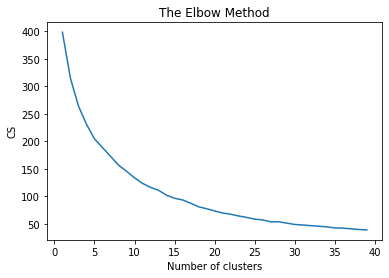

In [112]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

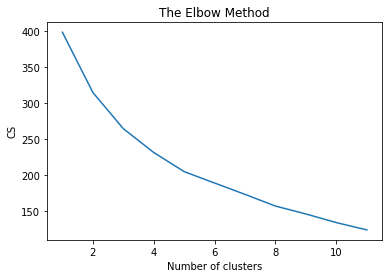

In [113]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=1, random_state=0)

In [115]:
labels=kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [116]:
Z=kmeans.cluster_centers_
Z

array([[0.19411765, 0.32058824, 0.58529412, 0.35294118, 0.50735294,
        0.52132353, 0.54558824]])

In [117]:

#tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
#tsne_scale_results = tsne.fit_transform(X)
#tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
#plt.figure(figsize = (10,10))
#plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
#plt.xlabel('tsne1')
#plt.ylabel('tsne2')
#plt.show()

In [118]:
import matplotlib

In [119]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 340 samples in 0.000s...
[t-SNE] Computed neighbors for 340 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 340 / 340
[t-SNE] Mean sigma: 0.670023
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.318840
[t-SNE] KL divergence after 2500 iterations: 0.259995


In [120]:
np.unique(labels)


array([0], dtype=int32)

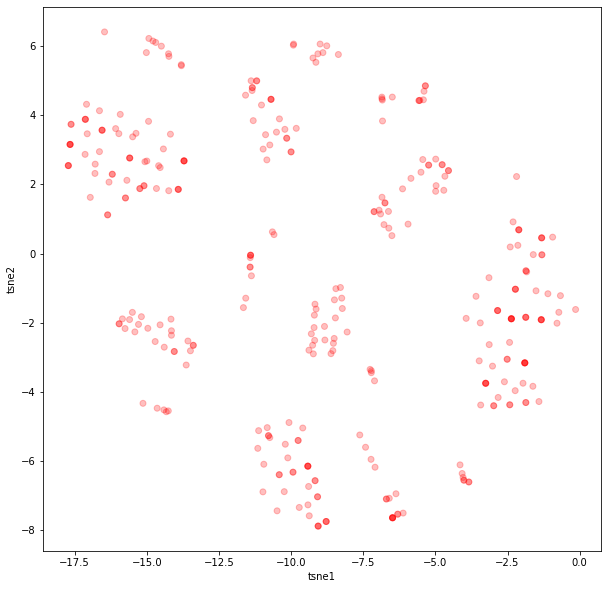

In [121]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [122]:
Z2 = ms.inverse_transform(Z)
Z2

array([[0.19411765, 0.32058824, 0.58529412, 0.35294118, 3.02941176,
        3.08529412, 3.18235294]])